# Predicting weather Reliance stock market goes Up or Down using Random Forest

In [1]:
# Import libraries
import yfinance as yf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

C:\Users\koushik\AppData\Roaming\Python\Python311\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


### Getting the Stock data

In [2]:
# Fetch the Reliance price data
data = yf.download('RELIANCE.NS', start="2019-01-01", end="2023-06-30")

# Display the data
data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-22,2359.187256,2375.155029,2337.035156,2340.265625,2332.027832,3809583
2023-06-23,2334.173828,2338.327393,2318.575195,2321.113525,2312.943115,3314285
2023-06-26,2313.960205,2321.713379,2297.069336,2303.391846,2295.283936,6320579
2023-06-27,2304.314941,2316.267578,2295.177246,2304.222656,2296.111816,4844733
2023-06-28,2319.498291,2342.434814,2305.514648,2334.727783,2326.509521,5677003


### Feature construction

In [3]:
# Features construction
data['Open-Close'] = (data.Open - data.Close)/data.Open
data['High-Low'] = (data.High - data.Low)/data.Low
data['percent_change'] = data['Adj Close'].pct_change()
data['std_5'] = data['percent_change'].rolling(5).std()
data['ret_5'] = data['percent_change'].rolling(5).mean()
data.dropna(inplace=True)

# X is the input variable
X = data[['Open-Close', 'High-Low', 'std_5', 'ret_5']]

# Y is the target or output variable
y = np.where(data['Adj Close'].shift(-1) > data['Adj Close'], 1, -1)

### Train-Test split

In [4]:
# Total dataset length
dataset_length = data.shape[0]

# Training dataset length
split = int(dataset_length * 0.75)
split

829

In [5]:
# Splitiing the X and y into train and test datasets
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(829, 4) (277, 4)
(829,) (277,)


### Creating the model on the data

In [6]:
# Create the model on train dataset

clf = RandomForestClassifier(criterion='gini')
model = clf.fit(X_train, y_train)


print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

# Run the code to view the classification report metrics

report = classification_report(y_test, model.predict(X_test))
print(report)

Correct Prediction (%):  46.931407942238266
              precision    recall  f1-score   support

          -1       0.45      0.33      0.38       137
           1       0.48      0.61      0.54       140

    accuracy                           0.47       277
   macro avg       0.47      0.47      0.46       277
weighted avg       0.47      0.47      0.46       277



### The model has an accuracy of : 47%

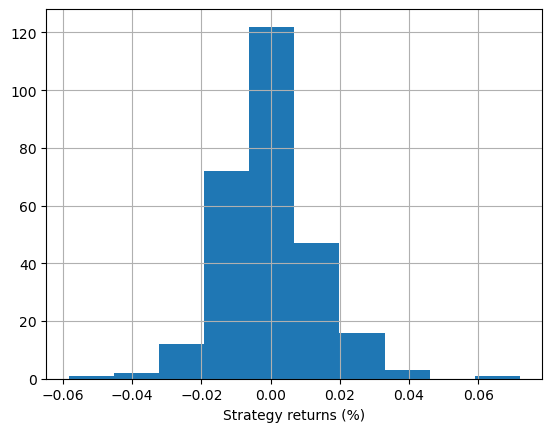

In [7]:
data['strategy_returns'] = data.percent_change.shift(-1) * model.predict(X)

data.strategy_returns[split:].hist()
plt.xlabel('Strategy returns (%)')
plt.show()

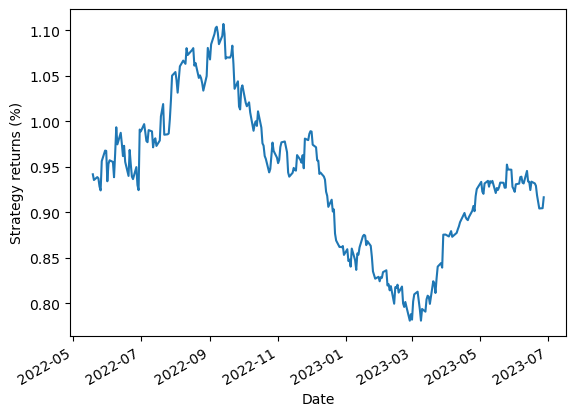

In [8]:
(data.strategy_returns[split:]+1).cumprod().plot()
plt.ylabel('Strategy returns (%)')
plt.show()